# Distribución de Poisson

La distribución de Poisson modela el número de veces que ocurre un evento en un intervalo fijo de tiempo o espacio, **siempre que los eventos ocurran de forma independiente y a una tasa constante**.

---

## 🧠 Intuición

Imaginá que estás contando cuántos autos pasan por una intersección por minuto. Si en promedio pasan 4 autos por minuto, y los autos pasan de forma aleatoria pero con esa tasa estable, entonces podés usar una **distribución de Poisson** para calcular la probabilidad de ver exactamente 0, 1, 2, ... autos en el siguiente minuto.

---

## 📐 Definición formal

Sea \( X \) una variable aleatoria que representa el número de eventos que ocurren en un intervalo dado. Entonces, $X \sim \text{Poisson}(\lambda)$ si:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

Donde:

- $ \lambda > 0 $: tasa promedio de ocurrencia por intervalo.
- $ k \in \{0, 1, 2, \dots\} $: número de eventos observados.
- $ e \approx 2.718 $: número de Euler.

---

## 📊 Propiedades

| Propiedad            | Fórmula                    |
|----------------------|----------------------------|
| Media (esperanza)    | $$ \mathbb{E}[X] = \lambda $$ |
| Varianza             | $$ \text{Var}(X) = \lambda $$ |
| Dominio              | $$ k = 0, 1, 2, \dots $$      |
| MGF (generadora)     | $$ M_X(t) = \exp(\lambda(e^t - 1)) $$ |

---

## 🧪 Condiciones para usarla

- Los eventos ocurren de forma **independiente**.
- La probabilidad de que ocurra un evento en un intervalo corto es proporcional a la longitud del intervalo.
- **No pueden ocurrir múltiples eventos al mismo tiempo**.

---

## 📦 Ejemplo típico

> Una central telefónica recibe en promedio 10 llamadas por hora. ¿Cuál es la probabilidad de que reciba exactamente 7 llamadas en la próxima hora?

Se puede modelar con una distribución de Poisson con $ \lambda = 10 $.

---

## 📌 Resumen

| Característica       | Detalle                           |
|----------------------|------------------------------------|
| Tipo de variable     | Discreta                          |
| Modelo               | Conteo de eventos                 |
| Parámetro            | $$ \lambda $$                     |
| Independencia        | Sí                                |
| Ejemplo común        | Errores por página, llamadas, colisiones |



----- Medidas Teóricas -----
Esperanza (E[X]): 10
Varianza (Var[X]): 10
Desviación estándar: 3.1623

P(X = 1) = 0.0005
P(X = 2) = 0.0023
P(X = 3) = 0.0076
P(X = 4) = 0.0189
P(X = 5) = 0.0378
P(X = 6) = 0.0631
P(X = 7) = 0.0901
P(X = 8) = 0.1126
P(X = 9) = 0.1251
P(X = 10) = 0.1251
P(X = 11) = 0.1137
P(X = 12) = 0.0948
P(X = 13) = 0.0729
P(X = 14) = 0.0521
P(X = 15) = 0.0347
P(X = 16) = 0.0217
P(X = 17) = 0.0128
P(X = 18) = 0.0071
P(X = 19) = 0.0037
P(X = 20) = 0.0019
P(X = 21) = 0.0009
P(X = 22) = 0.0004
P(X = 23) = 0.0002
P(X = 24) = 0.0001
P(X = 25) = 0.0000


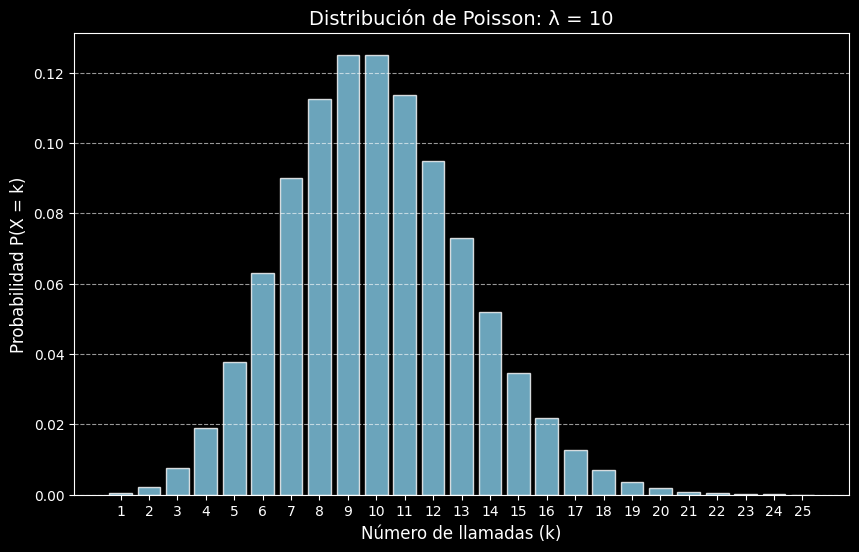

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro lambda
λ = 10

# Valores de k
k_vals = np.arange(1, 26)
probabilidades = poisson.pmf(k_vals, mu=λ)

# Medidas teóricas
esperanza = λ
varianza = λ
desviacion = np.sqrt(λ)

print("----- Medidas Teóricas -----")
print(f"Esperanza (E[X]): {esperanza}")
print(f"Varianza (Var[X]): {varianza}")
print(f"Desviación estándar: {desviacion:.4f}\n")

# Mostrar probabilidades
for k, p in zip(k_vals, probabilidades):
    print(f"P(X = {k}) = {p:.4f}")

# Gráfico
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(k_vals, probabilidades, color='skyblue', edgecolor='white', alpha=0.8)
plt.title('Distribución de Poisson: λ = 10', fontsize=14)
plt.xlabel('Número de llamadas (k)', fontsize=12)
plt.ylabel('Probabilidad P(X = k)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(k_vals)
plt.show()



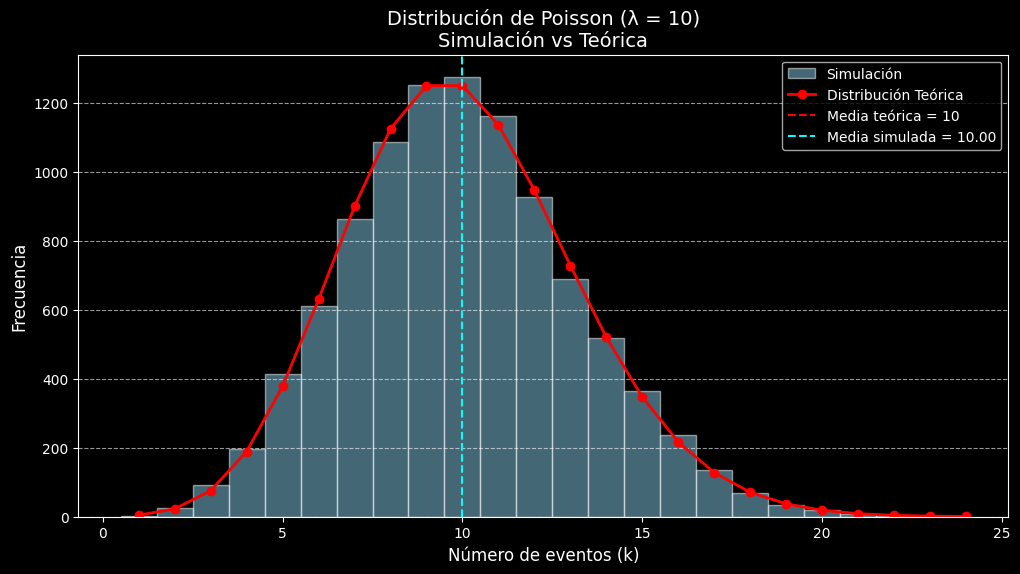

📊 Medidas Teóricas:
Media: 10
Varianza: 10
Desviación estándar: 3.1623

📈 Medidas Simuladas:
Media: 9.9973
Varianza: 10.1731
Desviación estándar: 3.1895


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro λ
λ = 10

# Simulación
np.random.seed(0)
size = 10000  # Número de experimentos
datos_simulados = np.random.poisson(lam=λ, size=size)

# Medidas teóricas
media_teorica = λ
varianza_teorica = λ
desviacion_teorica = np.sqrt(λ)

# Medidas simuladas
media_simulada = np.mean(datos_simulados)
varianza_simulada = np.var(datos_simulados)
desviacion_simulada = np.std(datos_simulados)

# Valores posibles y probabilidades teóricas
k_vals = np.arange(min(datos_simulados), max(datos_simulados) + 1)
prob_teorica = poisson.pmf(k_vals, mu=λ) * size  # Escalamos por cantidad de datos

# Graficamos
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.hist(datos_simulados, bins=k_vals-0.5, alpha=0.5, label='Simulación', color='skyblue', edgecolor='white')
plt.plot(k_vals, prob_teorica, 'o-', color='red', label='Distribución Teórica', lw=2)

# Mostrar medidas
plt.axvline(media_teorica, color='red', linestyle='--', label=f'Media teórica = {media_teorica}')
plt.axvline(media_simulada, color='cyan', linestyle='--', label=f'Media simulada = {media_simulada:.2f}')

plt.title(f'Distribución de Poisson (λ = {λ})\nSimulación vs Teórica', fontsize=14)
plt.xlabel('Número de eventos (k)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Imprimimos resultados
print("📊 Medidas Teóricas:")
print(f"Media: {media_teorica}")
print(f"Varianza: {varianza_teorica}")
print(f"Desviación estándar: {desviacion_teorica:.4f}")

print("\n📈 Medidas Simuladas:")
print(f"Media: {media_simulada:.4f}")
print(f"Varianza: {varianza_simulada:.4f}")
print(f"Desviación estándar: {desviacion_simulada:.4f}")
